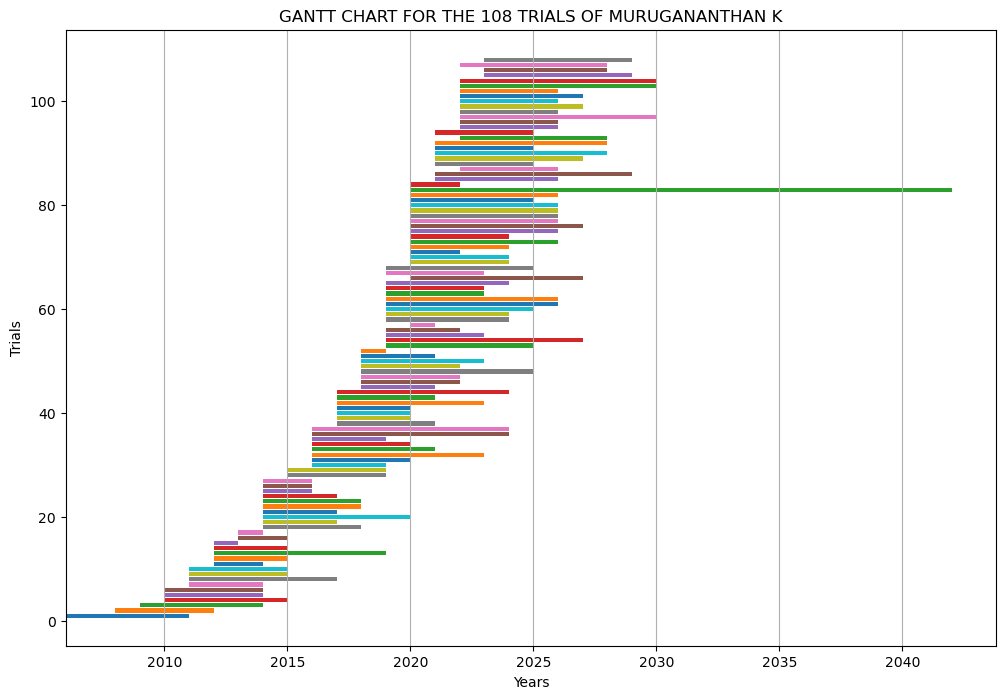

Done


In [2]:
#This script is used for creating Gantt Charts for the PI's with the highest number of trials in order to know how many trials 
#they have a run in a particular time period
import pandas as pd
import matplotlib.pyplot as plt

# Read data from Excel file
excel_file = '108_Start_date_end_dates_final.xlsx'
df = pd.read_excel(excel_file)

# Convert 'Start Date' and 'End Date' to datetime objects
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

# Extract the year from 'Start Date' and 'End Date'
df['Start Year'] = df['Start Date'].dt.year
df['End Year'] = df['End Date'].dt.year

# Create a Gantt chart
fig, ax = plt.subplots(figsize=(12, 8))

for i, row in df.iterrows():
    # Calculate the duration in years
    duration_years = max(row['End Year'] - row['Start Year'], 0.5)  # Ensure a minimum duration of 6 months
    ax.barh(row['Trial'], width=duration_years, left=row['Start Year'])

#the max(row['End Year'] - row['Start Year'], 0.5)
#expression ensures that the duration is at least 0.5 years. If the calculated duration is less than 0.5 years, it will be set to 0.5 years.    
    
    
    
# Format the date labels on the x-axis
ax.set_xlabel('Years')
ax.set_ylabel('Trials')
ax.set_title('GANTT CHART FOR THE 108 TRIALS OF MURUGANANTHAN K')
plt.grid(axis='x')
plt.savefig('OUTPUT.png')
plt.show()

print("Done")


In [1]:
import pandas as pd

# Assuming your Excel file is named 'your_file.xlsx'
df = pd.read_excel('RB_21_DharmeshD_StartDate_EndDate.xlsx')

# Initialize an empty dictionary to store trial results
result_dict = {}

# Find the minimum and maximum years in the entire DataFrame
min_year = df['Start Date'].dt.year.min()
max_year = df['End Date'].dt.year.max()

# Create a continuous range of years
all_years = range(min_year, max_year + 1)

# Iterate over years in the continuous range
for year in all_years:
    trial_results = {}
    
    # Iterate over rows in the DataFrame
    for index, row in df.iterrows():
        # Check if the trial falls within the particular year
        trial_results[row['Trial']] = int(row['Start Date'].year <= year <= row['End Date'].year)
    
    # Add trial results to the dictionary
    result_dict[year] = trial_results

# Convert the dictionary to a DataFrame
output_df = pd.DataFrame(result_dict)

# Write the result to an Excel file
output_df.to_excel('output_result_gantt_chart_continuous_years.xlsx')
print("Done")


Done
